# Clustering and Unsupervised learning

### Data for this assignment:
* URL: https://www.kaggle.com/ajaysingh123/wine-quality-clustering-unsupervised

* you should work without the ground truth labels. (Drop the corresponding column)


In [1]:
###import libraries
import pandas as pd
import numpy as np 
import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA

In [2]:
#load the data
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [4]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [7]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

###### Quality scale

In [8]:
###Updating the scale 3 - 8 with 0 - 5.
for index in df.index:
    if df.loc[index,'quality']==3:
        df.loc[index,'quality'] = 0
    elif df.loc[index,'quality']==4:
        df.loc[index,'quality'] = 1
    elif df.loc[index,'quality']==5:
        df.loc[index,'quality'] = 2
    elif df.loc[index,'quality']==6:
        df.loc[index,'quality'] = 3
    elif df.loc[index,'quality']==7:
        df.loc[index,'quality'] = 4
    elif df.loc[index,'quality']==8:
        df.loc[index,'quality'] = 5
    else:
        df.loc[index,'quality'] = 'NA'

In [9]:
df.quality.value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [10]:
wine_data =df.drop(columns="quality").copy()
quality = df['quality']
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


#### Question 1:
Create plots to visualize the distribution of all features. What did you find out?

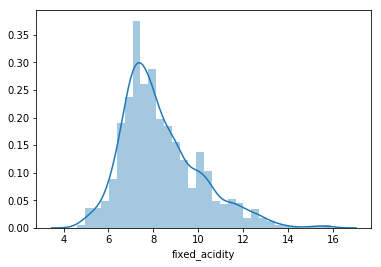

In [11]:
sns.distplot(wine_data['fixed_acidity'])
plt.show()

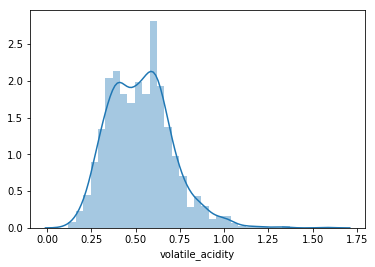

In [12]:
sns.distplot(wine_data['volatile_acidity'])
plt.show()

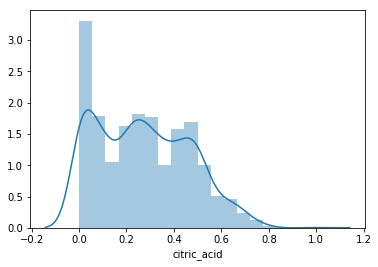

In [13]:
sns.distplot(wine_data['citric_acid'])
plt.show()

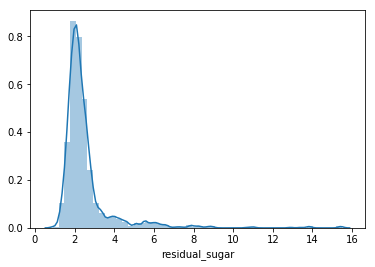

In [14]:
sns.distplot(wine_data['residual_sugar'])
plt.show()

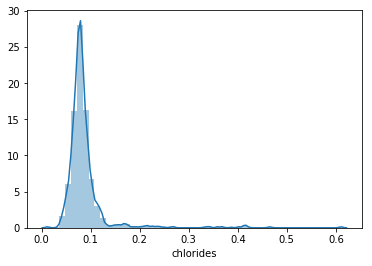

In [15]:
sns.distplot(wine_data['chlorides'])
plt.show()

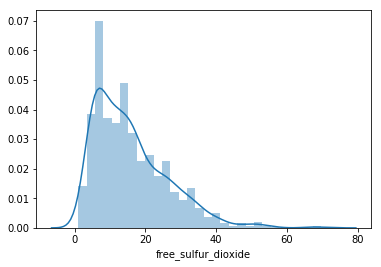

In [16]:
sns.distplot(wine_data['free_sulfur_dioxide'])
plt.show()

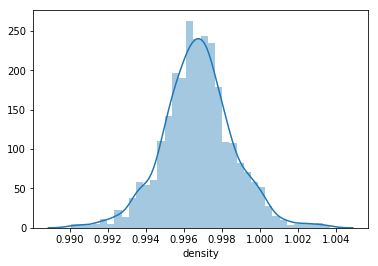

In [17]:
sns.distplot(wine_data['density'])
plt.show()

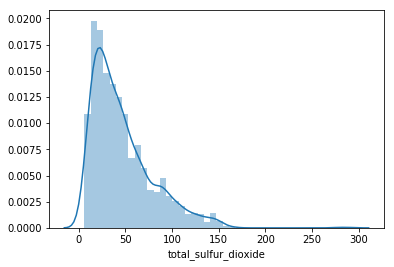

In [18]:
sns.distplot(wine_data['total_sulfur_dioxide'])
plt.show()

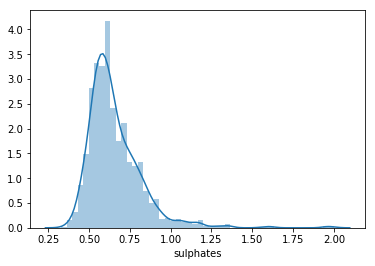

In [19]:
sns.distplot(wine_data['sulphates'])
plt.show()

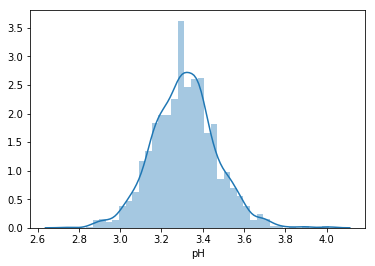

In [20]:
sns.distplot(wine_data['pH'])
plt.show()

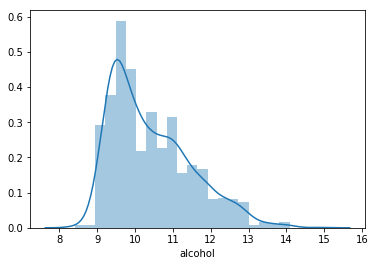

In [21]:
sns.distplot(wine_data['alcohol'])
plt.show()

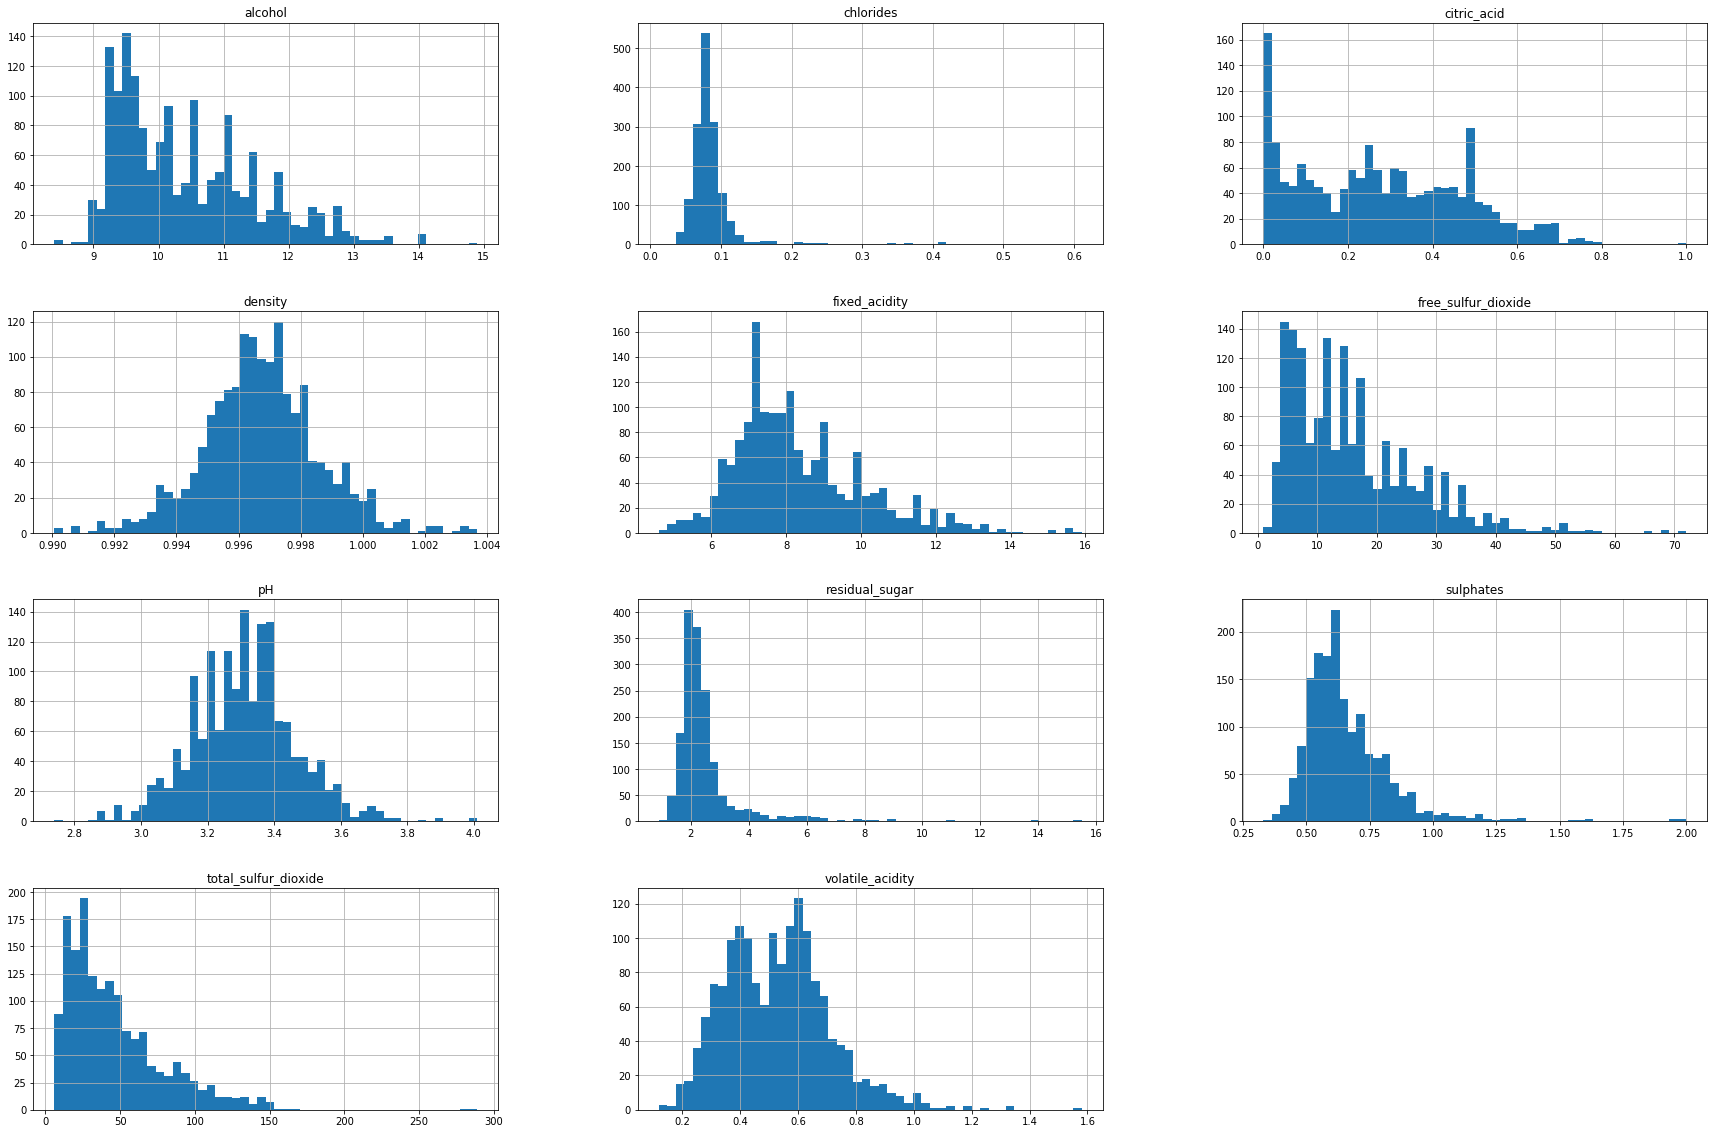

In [22]:
wine_data.hist(bins=50, figsize=(30,20))
plt.show()

<font color='blue'>From the distribution plots of the features we can observe that most of the features have only positive values. We can observe that extreme values are on the positive side in most cases and a lot of feature distribution is skewed to some extent. Based on the distribution of the data we can assume possible outliers in the data.</font>

In [12]:
###Scale the data
wine_data_scaled = StandardScaler().fit_transform(wine_data)

In [15]:
df_s = pd.DataFrame(wine_data_scaled)
df_s.columns=wine_data.columns

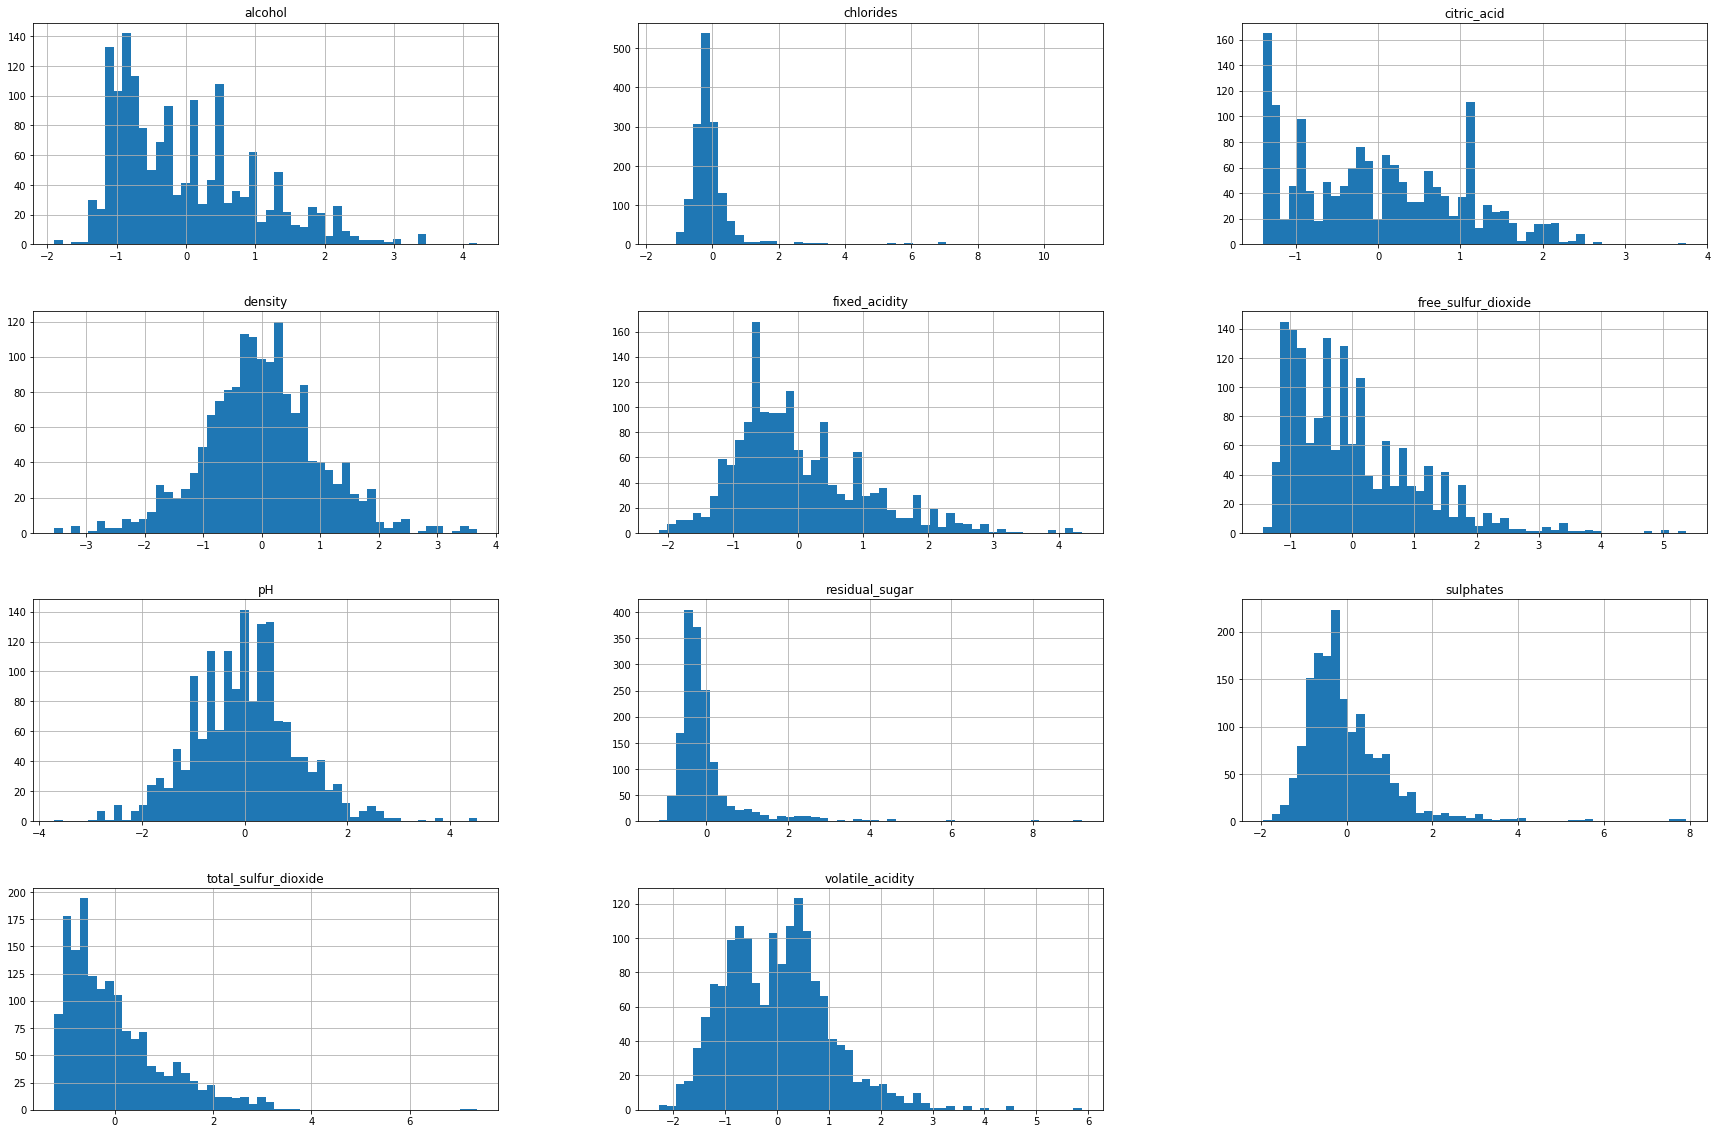

In [16]:
df_s.hist(bins=50, figsize=(30,20))
plt.show()

#### Question 2:
Create plots to visualize the data using PCA (top two principal components). Plot explained variance (%) in PCA. What would be a good threshold for the number of principal components if you wanted to reduce the dimensionality of the data?

In [17]:
##Before performing PCA, the data need to be standardized.
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pca_scaled.fit_transform(wine_data)

In [18]:
X_pca_scaled.shape

(1599, 2)

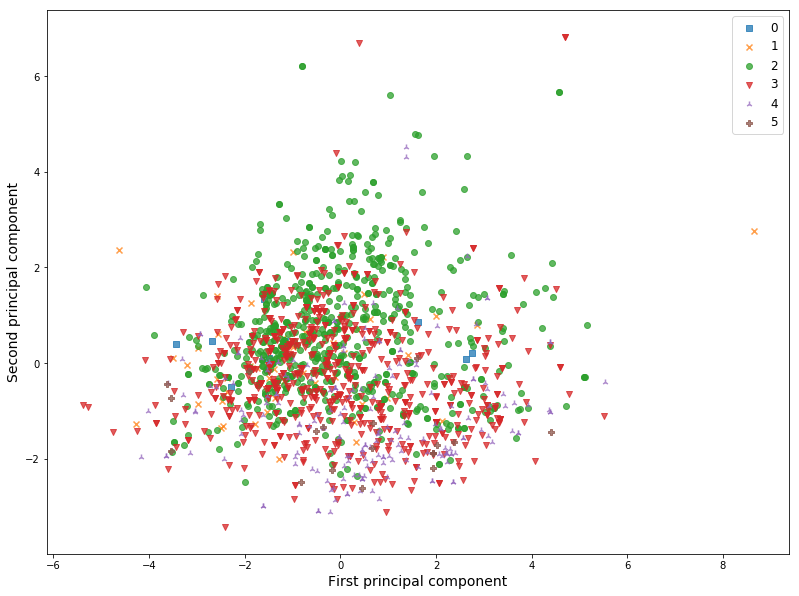

In [19]:
targets = np.unique(quality)
plt.figure(figsize=(18,10))
markers = ['s', 'x', 'o', 'v', '2', 'P']
colors = sns.color_palette(n_colors=targets.size)
for color, target, mark in zip(colors, targets, markers):
    plt.scatter(X_pca_scaled[quality == target, 0], X_pca_scaled[quality == target, 1], color=color, label=target,alpha=0.75, marker = mark)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component", fontsize = 14)
plt.ylabel("Second principal component", fontsize = 14)
plt.legend(loc='best', fontsize = 12)
plt.show()

<Figure size 432x288 with 0 Axes>

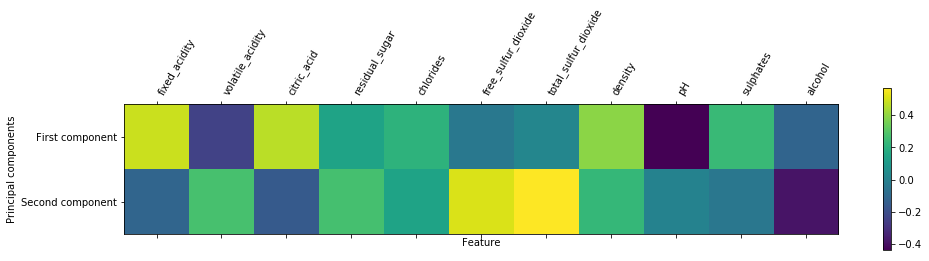

In [20]:
components = (pca_scaled.named_steps['pca'].components_)[:2]
plt.figure()
plt.matshow(components, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(wine_data.columns)),
           wine_data.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

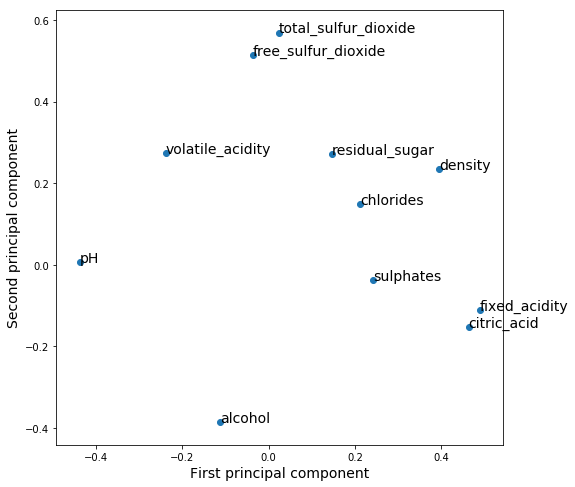

In [21]:
plt.figure(figsize=(8, 8))
plt.scatter(components[0], components[1])
for i, feature_contribution in enumerate(components.T):
    plt.annotate(wine_data.columns[i], feature_contribution, fontsize = 14)
plt.xlabel("First principal component", fontsize = 14)
plt.ylabel("Second principal component", fontsize = 14)
plt.show()

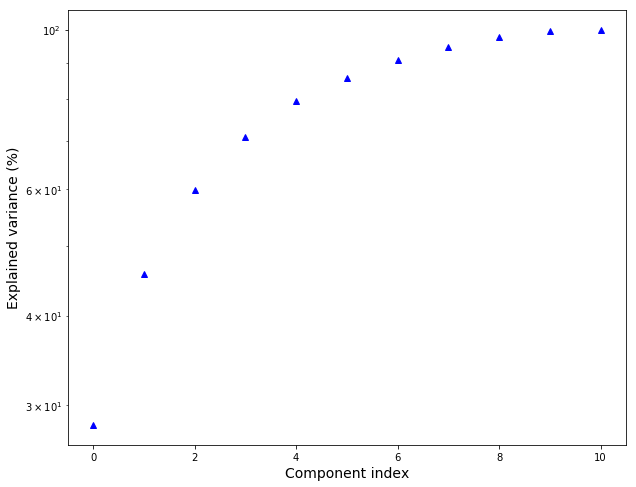

In [22]:
pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(wine_data)
pca = pca_scaled.named_steps['pca']

plt.figure(figsize=(10,8))
plt.semilogy(np.cumsum(pca.explained_variance_ratio_*100), 'b^')
plt.xlabel("Component index", fontsize = 14)
plt.ylabel("Explained variance (%)", fontsize = 14)
plt.show()

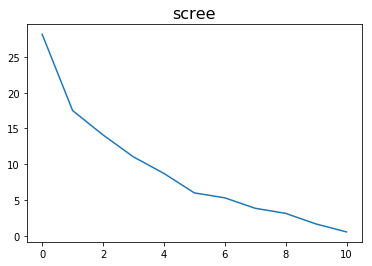

In [23]:
plt.title("scree", fontsize = 16)
plt.plot(pca.explained_variance_ratio_*100) # scree plot
plt.show()

In [24]:
cum_var = pca.explained_variance_ratio_
cum_var

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483,
       0.00541439])

In [25]:
cum_var_sum = np.cumsum(pca.explained_variance_ratio_)
pca_dim = np.argmax(cum_var_sum >= 0.85) + 1
pca_dim

6

<font color='blue'>Let's check using eigenvectors and eigenvalues. </font>

In [26]:
sc = StandardScaler()
wine_train_std = sc.fit_transform(wine_data)

In [27]:
###covariance matix and eigenvector and eigenvalues
import numpy as np
covar_matrix = np.cov(wine_train_std)
eigen_vals, eigen_vects = np.linalg.eig(covar_matrix)

In [28]:
###Total and explained variance
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [29]:
cum_var_exp
pca_dim = np.argmax(cum_var_exp >= 0.85) + 1
pca_dim

6

<font color='blue'>We choose '6' as the threshold for principle components. Let's cross validate the decision by performing performance test on original data and pca data with top 6 features. </font>

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(wine_data,quality)
pred = neigh.predict(wine_data)
print('Confusion matrix:')
print(confusion_matrix(pred,quality))
print('\nAccuracy:')
print(accuracy_score(pred,quality))

Confusion matrix:
[[ 10   3   1   1   1   0]
 [  0  18  12  15   3   1]
 [  0  15 571 114  34   5]
 [  0  16  91 481  34   9]
 [  0   1   6  26 126   1]
 [  0   0   0   1   1   2]]

Accuracy:
0.7554721701063164


In [31]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_pca_scaled[:,:6],quality)
pred = neigh.predict(X_pca_scaled[:,:6])
print('Confusion matrix:')
print(confusion_matrix(pred,quality))
print('\nAccuracy:')
print(accuracy_score(pred,quality))

Confusion matrix:
[[  7   3   4   4   1   0]
 [  0  20  17  14   7   0]
 [  2  18 551 115  36   4]
 [  1  11  91 477  27   8]
 [  0   1  18  26 128   3]
 [  0   0   0   2   0   3]]

Accuracy:
0.7417135709818636


<font color='blue'>PCA is the process that aims to compress the data from high dimensional feature space onto a lower-dimensional feature subspace by preserving most of the relevant information. Principle components are the eigenvectors with most of the information whose magnitude is defined by eigenvalues. Variance explained the ratio of an eigenvalue is the fraction of an eigenvalue to the total sum of the eigenvalues. </font>

<font color='blue'>The threshold for the number of principal components by a trade-off between computational efficiency and classifier performance. This can be achieved by choosing the principle components that cover the most variance of data. </font>

<font color='blue'>By observing the explained variance plots we can say that the first component explains approximately 28% of the variance of the data. Ideally, the elbow shape in the curve needs to be considered to choose the principal components as the explained variance of the latent variable reflects a steady decrease. Here to reduce the dimensionality of the data we choose 6 variables as the good threshold for the number of principal components as they cover almost 85% of the data variation or information. </font>

<font color='blue'>We can observe that there is no much difference between the performance of models built on original data and PCA data with the top 6 features. So here to reduce the dimensionality of the data we choose 6 variables as the good threshold for the number of principal components as they cover almost 85% of the data variation or information. If we choose 7 features then we can achieve more than 90% of the variation, but we can see that there is no much difference in the accuracy score of original data and PCA data with 6 features. </font>

#### Question 3: 
Create plots to visualize the data using t-SNE. Would parameter tuning help to gain a better visualization? Discuss your results and findings.

In [32]:
from sklearn.manifold import TSNE
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
wine_tsne = tsne.fit_transform(wine_data)

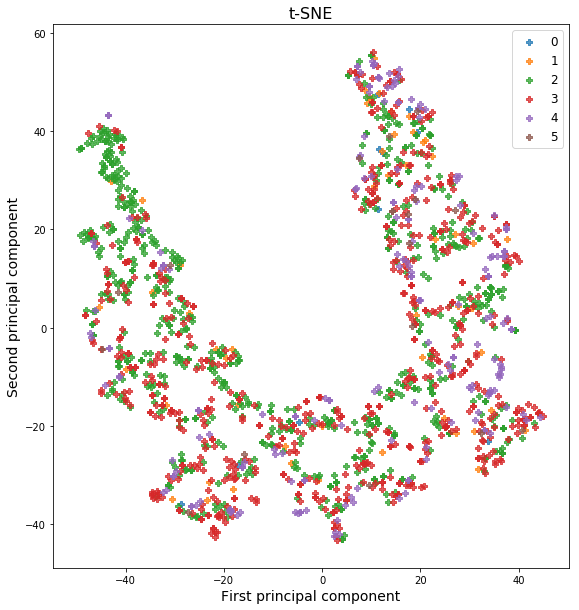

In [35]:
plt.figure(figsize=(10,10))
targets = np.unique(quality)
markers = ['s', 'x', 'o', 'v', '2', 'P']
colors = sns.color_palette(n_colors=targets.size)
for color, target in zip(colors, targets):
    plt.scatter(wine_tsne[quality == target, 0], wine_tsne[quality == target, 1], color=color, label=target,alpha=0.75, marker = mark)
plt.gca().set_aspect("equal")
plt.title("t-SNE", fontsize = 16)
plt.xlabel("First principal component", fontsize = 14)
plt.ylabel("Second principal component", fontsize = 14)
plt.legend(loc='best', fontsize = 12)
plt.show()

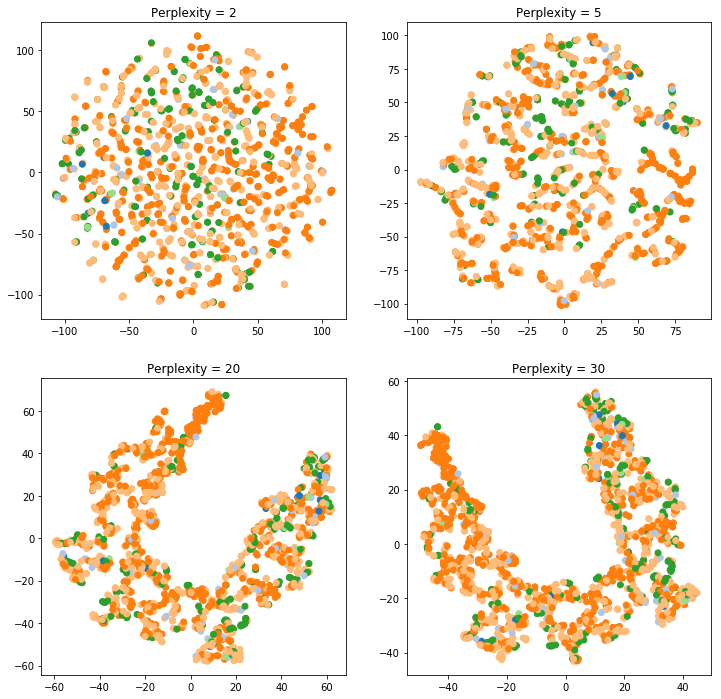

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for i, perplexity in enumerate([2, 5, 20, 30]):
    plt.sca(axes[i // 2, i % 2])
    wine_tsne = TSNE(n_components=2,perplexity=perplexity, random_state=42).fit_transform(wine_data)
    plt.scatter(wine_tsne[:, 0], wine_tsne[:, 1], c=plt.cm.tab20(quality))
    plt.title("Perplexity = {}".format(perplexity))

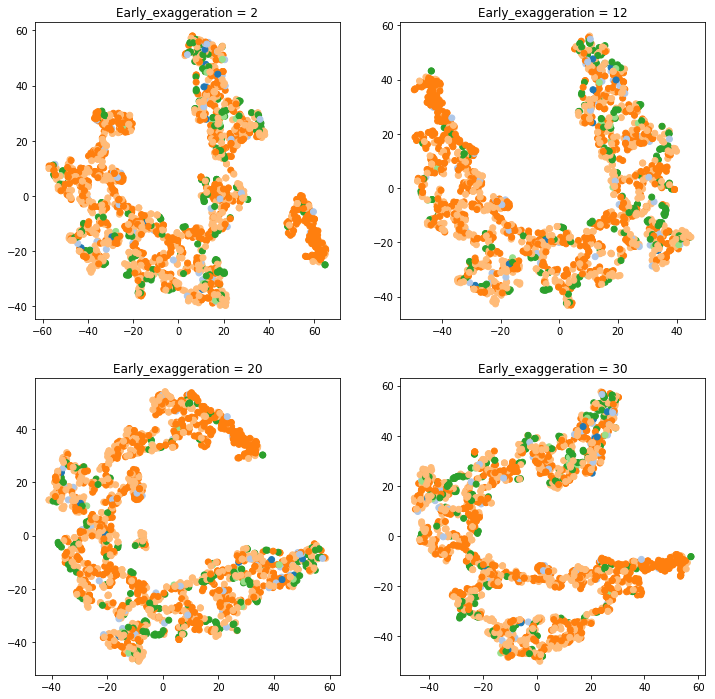

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for i, early_exaggeration in enumerate([2, 12, 20, 30]):
    plt.sca(axes[i // 2, i % 2])
    wine_tsne = TSNE(n_components=2,perplexity=30,
                       early_exaggeration=early_exaggeration, random_state=42).fit_transform(wine_data)
    plt.scatter(wine_tsne[:, 0], wine_tsne[:, 1], c=plt.cm.tab20(quality))
    plt.title("Early_exaggeration = {}".format(early_exaggeration))

##### Scaling

In [38]:
tsne_scaled = make_pipeline(StandardScaler(), TSNE(random_state=42))
wine_tsne_scaled = tsne_scaled.fit_transform(wine_data)

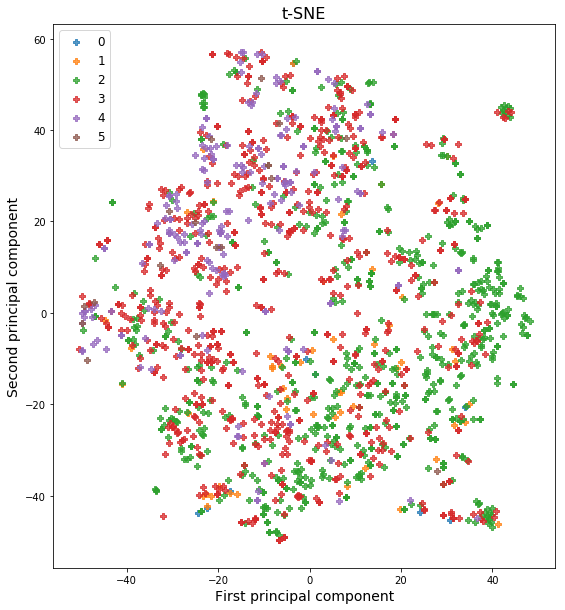

In [43]:
plt.figure(figsize=(10,10))
targets = np.unique(quality)
markers = ['s', 'x', 'o', 'v', '2', 'P']
colors = sns.color_palette(n_colors=targets.size)
for color, target in zip(colors, targets):
    plt.scatter(wine_tsne_scaled[quality == target, 0], wine_tsne_scaled[quality == target, 1], color=color, label=target,alpha=0.75,marker = mark)
plt.gca().set_aspect("equal")
plt.title("t-SNE", fontsize = 16)
plt.xlabel("First principal component", fontsize = 14)
plt.ylabel("Second principal component", fontsize = 14)
plt.legend(loc='best', fontsize = 12)
plt.show()

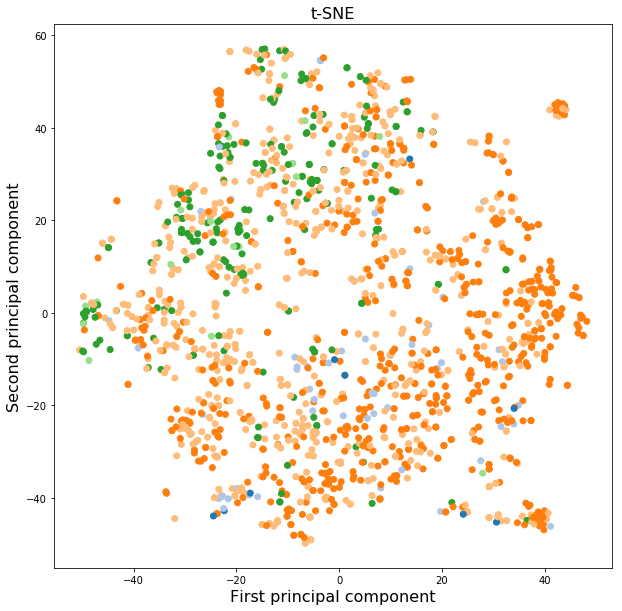

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(wine_tsne_scaled[:, 0], wine_tsne_scaled[:, 1], c=plt.cm.tab20(quality))
plt.title("t-SNE", fontsize = 16)
plt.xlabel("First principal component", fontsize = 16)
plt.ylabel("Second principal component", fontsize = 16)
plt.show()

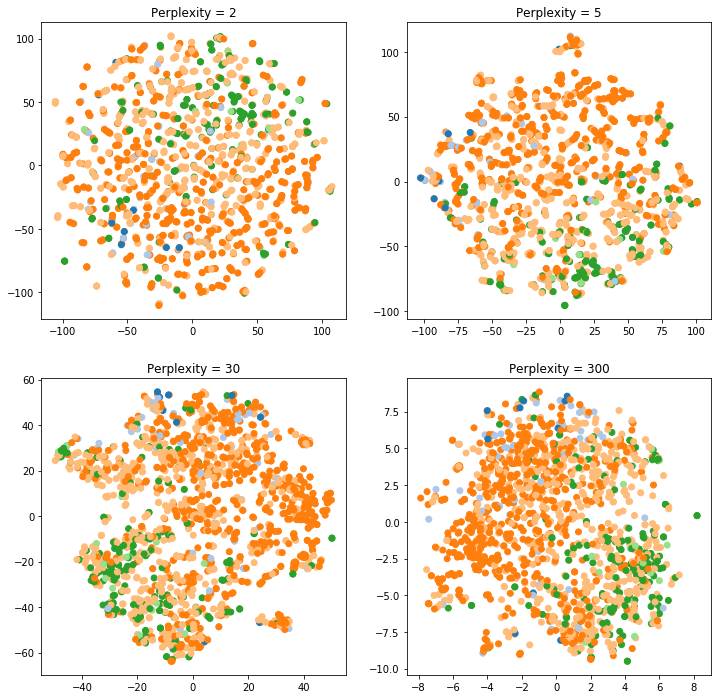

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for i, perplexity in enumerate([2, 5, 30, 300]):
    plt.sca(axes[i // 2, i % 2])
    tsne_scaled = make_pipeline(StandardScaler(), TSNE(perplexity=perplexity, random_state=42))
    wine_tsne_scaled = tsne_scaled.fit_transform(wine_data)
    plt.scatter(wine_tsne_scaled[:, 0], wine_tsne_scaled[:, 1], c=plt.cm.tab20(quality))
    plt.title("Perplexity = {}".format(perplexity))

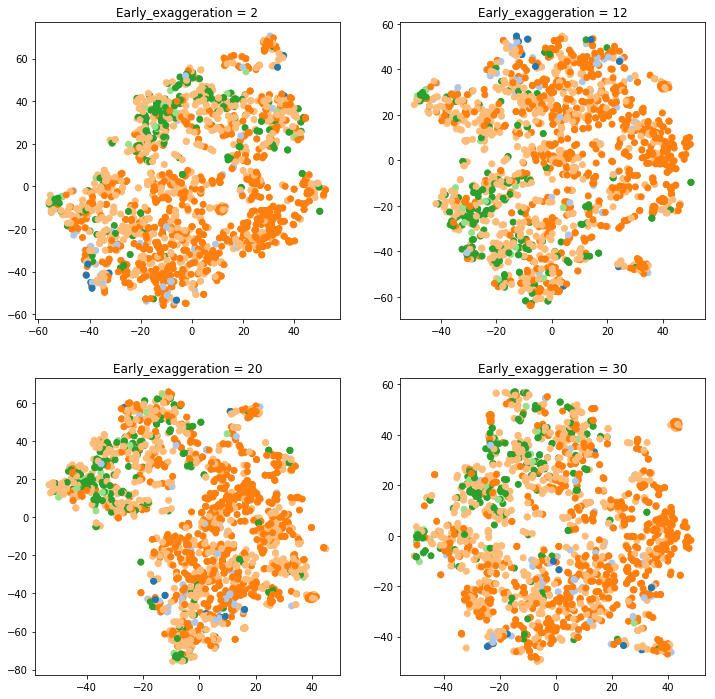

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for i, early_exaggeration in enumerate([2, 12, 20, 30]):
    plt.sca(axes[i // 2, i % 2])
    tsne_scaled = make_pipeline(StandardScaler(), TSNE(perplexity=30, 
                                                       early_exaggeration=early_exaggeration, random_state=42))
    wine_tsne_scaled = tsne_scaled.fit_transform(wine_data)
    plt.scatter(wine_tsne_scaled[:, 0], wine_tsne_scaled[:, 1], c=plt.cm.tab20(quality))
    plt.title("Early_exaggeration = {}".format(early_exaggeration))

<font color='blue'>t-SNE plots are useful for visualizing high dimensional data. The main objective of t_SNE is to pick a set of points in a high-dimensional space and represent them in two-dimensional space by preserving the distances between the points as best as possible. "perplexity" is the tunable parameter of the t-SNE, represents the number of close neighbors each point of the data has.</font>

<font color='blue'>Initially we applied t-SNE on the original data and visualizations are not much clear. For different values of perplexity, most of the clusters are merged that illustrates a pitfall. We also observed clusters formation with different shapes.</font>

<font color='blue'>As the next, step we applied t-SNE on the scaled data and performed parameter tuning using the "perplexity" and "early_exaggeration". We see that t-SNE with perplexity value 30 and early_exaggeration value 12 has not been able to separate the classes exactly but has been able to construct clusters with small neighbors where points belong to the same class are concentrated. class '3' and '4' show the majority in the plots. </font>

#### Question 4: 
Use different clustering algorithms to cluster the data: K-Means, DBSCAN, Agglomerative clustering, Gaussian Mixture. For each algorithm, tune the parameters for a reasonable outcome, inspect and visualize the outcome. Discuss your results and findings.

##### Elbow method

<font color='blue'>In K-means the objective is to create K groups based on the average of the variables and tries to minimize the within-cluster sum of squares(WCSS). To find the optimal number of clusters we can apply Elbow method. The optimum number lies in the inflection point of the graph. </font>

In [47]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(wine_data_scaled) for k in range(2, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

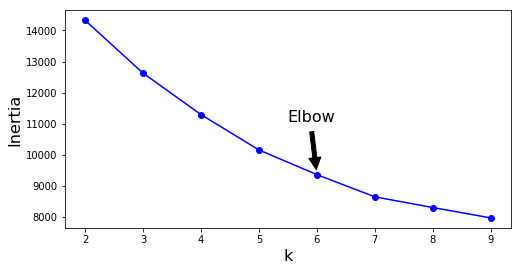

In [48]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), inertias, "bo-")
plt.xlabel("k", fontsize=16)
plt.ylabel("Inertia", fontsize=16)
plt.annotate('Elbow',
             xy=(6, inertias[4]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

<font color='blue'>In the above graph we can see that the inertia for k = 3 is higher than k = 6. We cannot assume the value of k that minimizes the inertia since it keeps getting lower as we increase the value of k. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. By analyzing the resultant curve we are assuming k value as 6.</font>

##### Silhouette score and diagram

<font color='blue'>We can also use the silhouette score to find the optimal k value. The Silhouette Coefficient is calculated using the mean intra-cluster distance and the mean nearest-cluster distance for each sample. The silhouette score requires a silhouette coefficient over all the instances. Usually, the Silhouette coefficient value varies between -1 and +1. We can say that the instance may be assigned to the wrong cluster if the coefficient value is -1 or negative. An instance can be assumed to be close to a cluster decision boundary if the value is close to 0. If the coefficient value is close to +1 then the instance is said to be inside its cluster and distant from the other clusters.</font>

In [49]:
from sklearn.metrics import silhouette_score

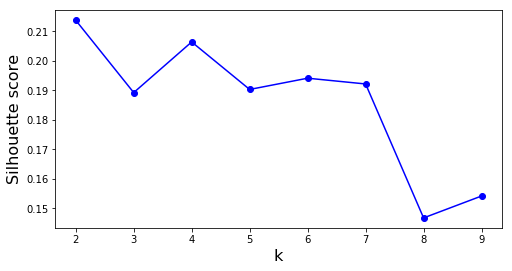

In [50]:
silhouette_scores = [silhouette_score(wine_data_scaled, model.labels_) for model in kmeans_per_k]

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=16)
plt.ylabel("Silhouette score", fontsize=16)
plt.show()

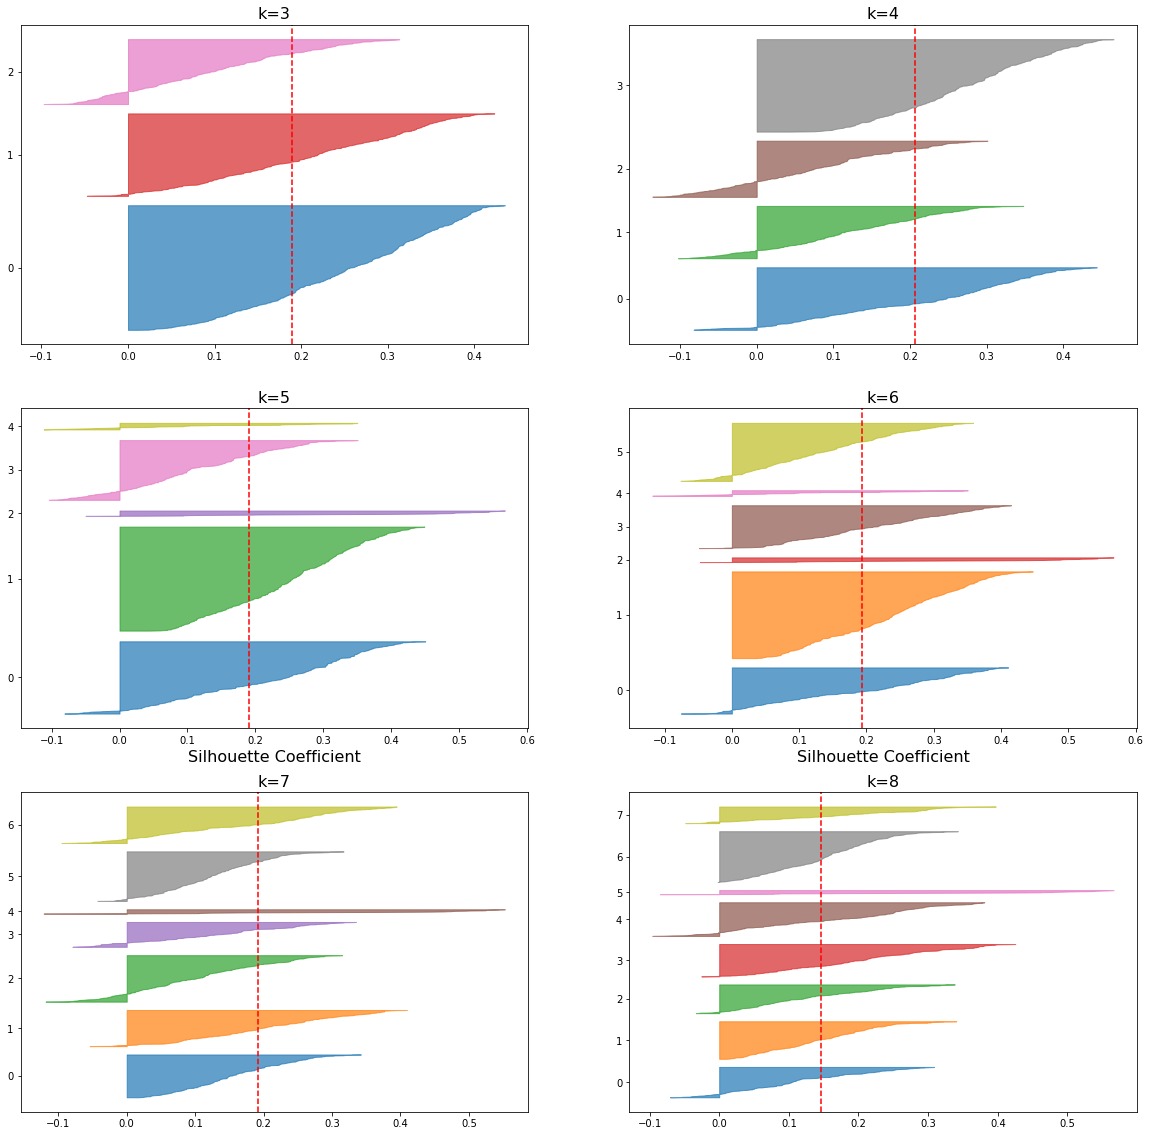

In [51]:
from sklearn.metrics import silhouette_samples
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
plt.figure(figsize=(20, 20))

for k in (3, 4, 5, 6, 7, 8):
    plt.subplot(3, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(wine_data_scaled, y_pred)

    padding = len(wine_data_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.tab10(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (5, 6):
        plt.xlabel("Silhouette Coefficient", fontsize=16)
    
    
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("k={}".format(k), fontsize=16)

plt.show()

<font color='blue'>We can say that this method is better as it makes the decision regarding the optimal number of clusters more meaningful and clear. We can see that K = 5,6,7 got same range of scores. We can say that K = 6 is also a good choice, but based on the scores we choose the value of K as 4.</font>

In [138]:
clusterNum = 4
k_means =KMeans(init='k-means++', n_clusters=clusterNum, n_init=12,random_state=42)
k_means.fit_predict(wine_data_scaled)
labels = k_means.labels_
print(labels)

[0 2 0 ... 0 0 0]


In [139]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0: 719, 1: 476, 2: 375, 3: 29}

<font color='blue'>Let's visualize the clusters with predicted labels.</font>

In [163]:
alcohol =np.array(wine_data['alcohol'])
sulphates=np.array(wine_data['sulphates'])

Text(0, 0.5, 'sulphates')

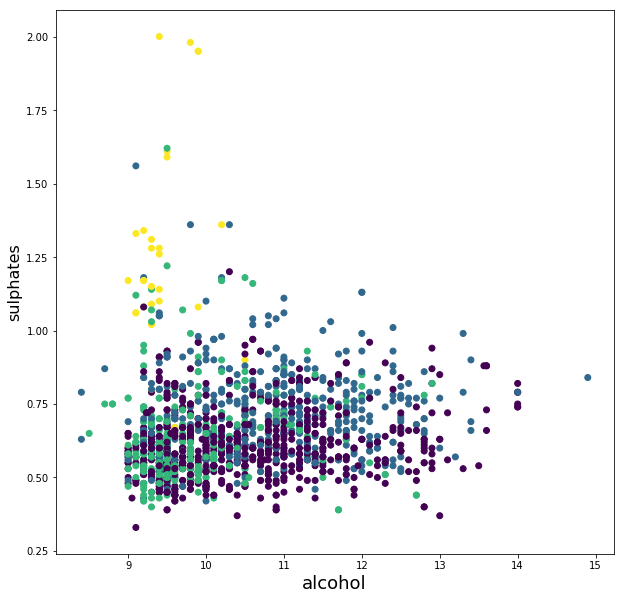

In [150]:
plt.subplots(figsize=(10, 10))
plt.scatter(alcohol, sulphates, c=labels.astype(np.float))
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('sulphates', fontsize=16)

<font color='blue'>Let's visualize the clusters with True labels. </font>

Text(0, 0.5, 'sulphates')

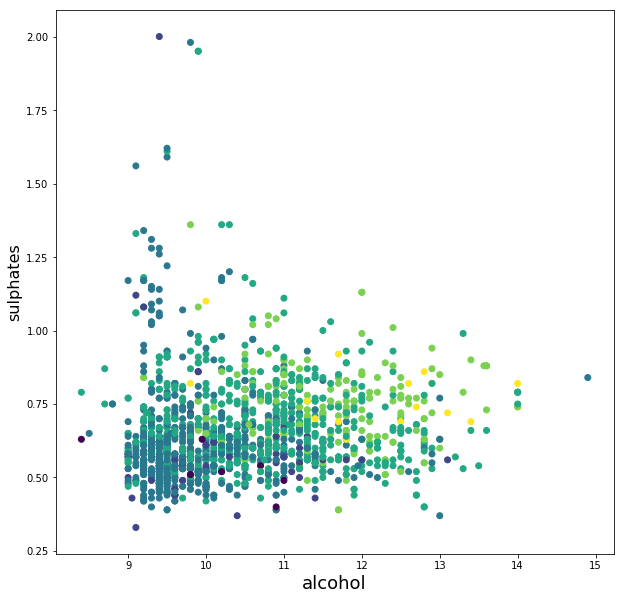

In [151]:
True_labels=np.array(quality)
plt.subplots(figsize=(10, 10))
plt.scatter(alcohol, sulphates, c=True_labels.astype(np.float))
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('sulphates', fontsize=16)

#### DBSCAN

<font color='blue'>DBSCAN is a density-based clustering algorithm that separates clusters of high density from clusters of low density. DBSCAN can sort the data into clusters of varying shapes. Usually, the DBSCAN algorithm is used to find associations and structures in data that are hard to find manually but that can be relevant and useful to find patterns. </font>

<font color='blue'>Based on the set of points, DBSCAN groups together points that are close to each other based on a distance measurement (Euclidean distance) and a minimum number of points. 'eps' parameter specifies how close points should be to each other to be considered a part of a cluster. If the eps value is too small, a large part of the data will not be clustered. Whereas, if the value is high then clusters will merge and the majority of data points will be in the same cluster. It will consider the points in the low-density region as outliers.</font>

In [294]:
from sklearn.cluster import DBSCAN

dbscan_1 = DBSCAN(eps=0.4, min_samples=5).fit(wine_data_scaled)
dbscan_2 = DBSCAN(eps=0.5, min_samples=5).fit(wine_data_scaled)
dbscan_3 = DBSCAN(eps=0.6, min_samples=5).fit(wine_data_scaled)
dbscan_4 = DBSCAN(eps=0.7, min_samples=5).fit(wine_data_scaled)

In [295]:
np.unique(dbscan_1.labels_)

array([-1,  0], dtype=int64)

In [296]:
np.unique(dbscan_2.labels_)

array([-1,  0,  1,  2], dtype=int64)

In [297]:
np.unique(dbscan_3.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [301]:
np.unique(dbscan_4.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

Text(0, 0.5, 'sulphates')

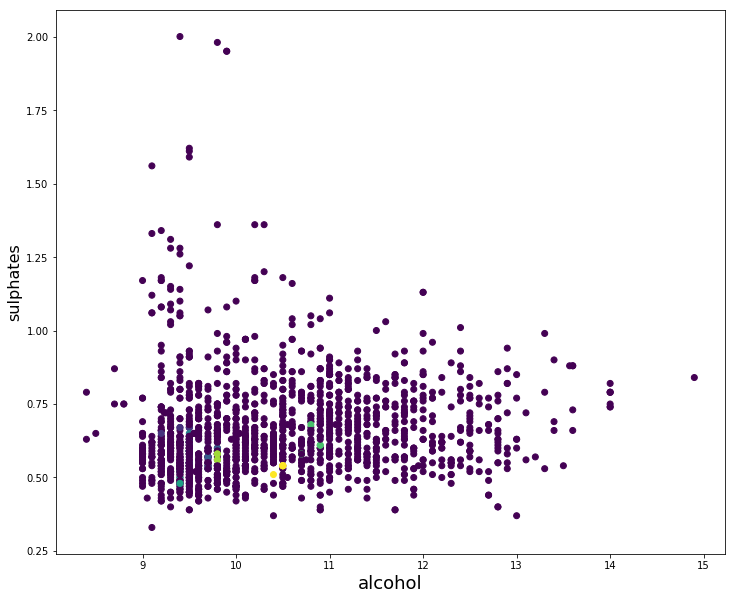

In [300]:
db_labels=np.array(dbscan_3.labels_)
plt.subplots(figsize=(12, 10))
plt.scatter(alcohol, sulphates, c=db_labels.astype(np.float))
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('sulphates', fontsize=16)

In [302]:
def plot_dbscan(dbscan, X, size = [100, 40]):
    cores = dbscan.components_
    anomalies = X[dbscan.labels_ == -1]
    bound_index = list(set(np.where(dbscan.labels_ != -1)[0]).symmetric_difference(dbscan.core_sample_indices_))
    boundaries = X[bound_index]
    
    plt.scatter(cores[:, 0], cores[:, 1], marker='^', s=size[0],# edgecolors='k',
                c=dbscan.labels_[dbscan.core_sample_indices_], cmap=plt.cm.Paired)
    
    plt.scatter(boundaries[:, 0], boundaries[:, 1], marker='o', s=size[1], edgecolors='k',
                c=dbscan.labels_[bound_index], cmap=plt.cm.Paired)
    
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=size[0])
    plt.xlabel("X1", fontsize=16)
    plt.ylabel("X2", fontsize=16)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=16)

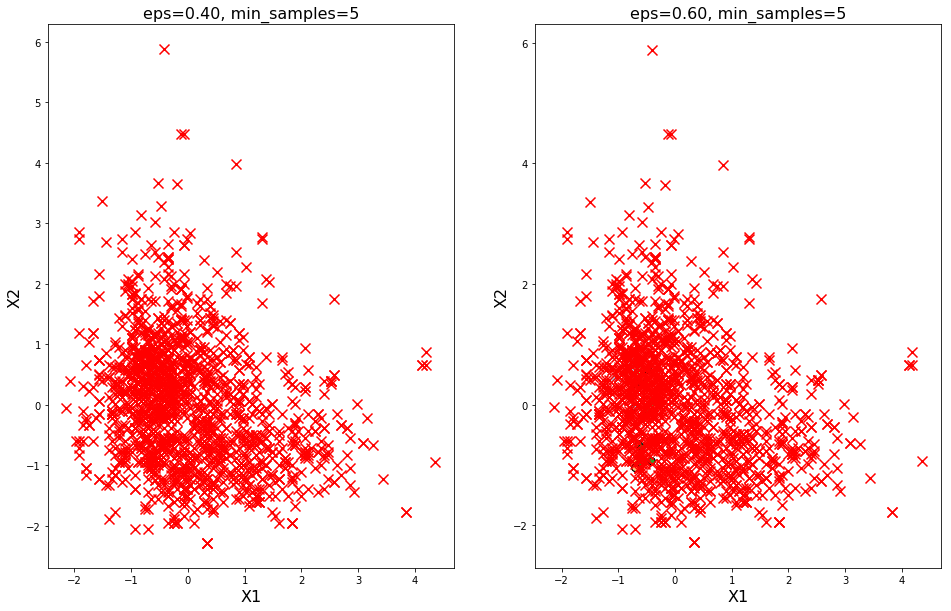

In [304]:
plt.figure(figsize=(16, 10))

plt.subplot(121)
plot_dbscan(dbscan_1, wine_data_scaled, [100, 30])

plt.subplot(122)
plot_dbscan(dbscan_3, wine_data_scaled, [100, 50])

plt.show()

<font color='blue'>By observing the above values and the plots we can say that DBSCAN struggles with clusters of the same density and with high dimensionality data. To say simple, DBSCAN suffers if data has two many dimensions.</font>

#### Agglomerative clustering

<font color='blue'>Agglomerative clustering or bottom-up clustering algorithm starts from an individual cluster means each data point is considered as an individual cluster which is also known as the leaf, then every cluster calculates their distance with each other. Two clusters with the shortest distance would merge forming a node. The process of calculating the cluster distance from the member of their cluster with another cluster repeats until all the data points assigned to one cluster called root. This results in a tree-based representation of the objects which is known as a dendrogram. Put simply, Agglomerative clustering starts with many small clusters and merges them to create bigger clusters. </font>

<font color='blue'>Linkage criteria refers to how the distance between clusters is measured to form two closest clusters</font>

<font color='blue'>Single linkage - Shortest distance between two points in each cluster.</font>
    
<font color='blue'>Complete linkage - Longest distance between two points in each cluster.</font>
    
<font color='blue'>Average linkage - Average distance between each point in one cluster to every point in other cluster.</font>
    
<font color='blue'>Ward Linkage - Sum of squared differences within all clusters.</font>

ward : [530 485 452  99  33]
average : [1567   18    8    4    2]
complete : [1126  419   47    5    2]
single : [1591    4    2    1    1]


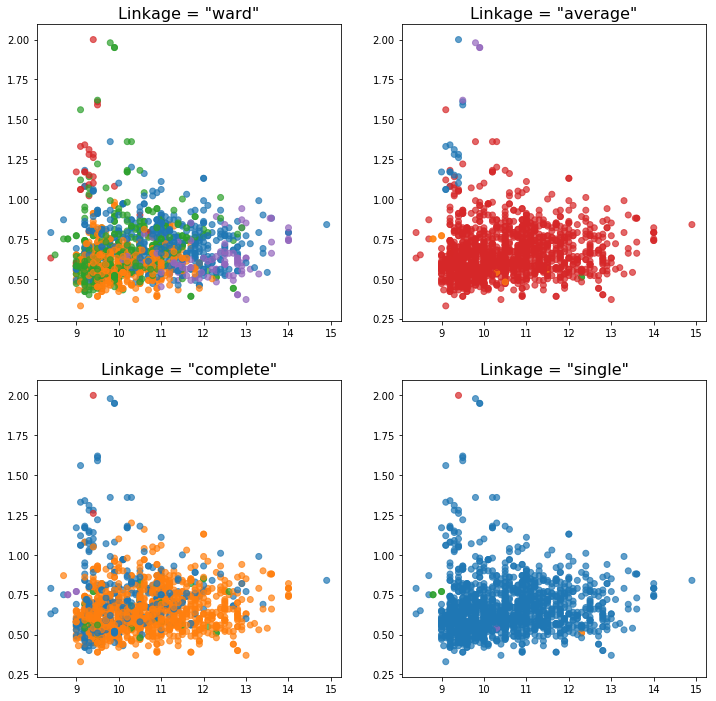

In [191]:
from sklearn.cluster import AgglomerativeClustering
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for i, linkage in enumerate(["ward", "average", "complete", "single"]):
    agg = AgglomerativeClustering(n_clusters=5, linkage=linkage)
    agg.fit(wine_data_scaled)    
    plt.sca(axes[i // 2, i % 2])
    plt.scatter(fixed_acidity, volatile_acidity, c=plt.cm.tab10(agg.labels_), alpha=.7)
    plt.title('Linkage = "{}"'.format(linkage), fontsize = 16)
    print('{} : {}'.format(linkage, np.sort(np.bincount(agg.labels_))[::-1]))

#### Dendrogram

<font color='blue'>Dendogram is useful to choose a number of clusters for the data. Dendrogram only shows the hierarchy of the data, it does not exactly give the optimal number of clusters.</font>

<font color='blue'>The best way to determine cluster number is by picking a certain value as our cut-off point manually. Normally, we choose the cut-off point that cut the tallest vertical line. The number of intersections with the vertical line made by the horizontal line would yield the number of clusters. </font>

<font color='blue'>Here if we choose a cutoff point at 60 would give us 3 different clusters. If we choose a different cut-off point at 50, we would get 4 clusters. Choosing different cut-off points will result in a different number of clusters. For our data, we believe the optimal number of clusters is 4.</font>

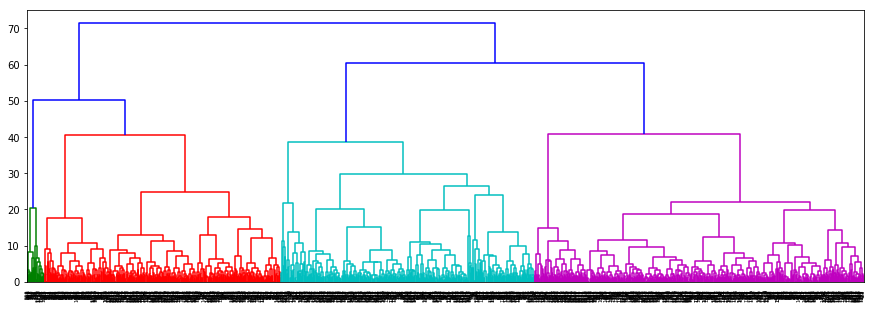

In [192]:
from scipy.cluster.hierarchy import dendrogram, ward

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15, 5))
dendrogram = sch.dendrogram(sch.linkage(wine_data_scaled, method='ward'))

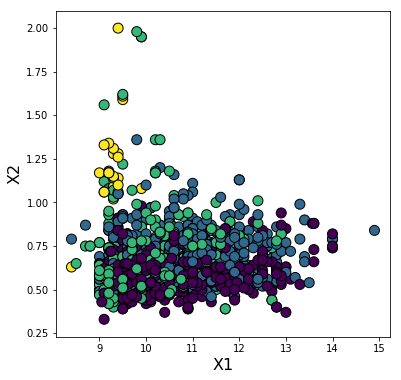

In [193]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
assignment = agg.fit_predict(wine_data_scaled)

plt.figure(figsize=(6,6))
plt.scatter(alcohol, sulphates, c = assignment, s = 100, edgecolors='k')
plt.xlabel("X1", fontsize = 16)
plt.ylabel("X2", fontsize = 16)
plt.show()

In [129]:
agg_labels = agg.labels_
agg_labels

array([0, 0, 0, ..., 2, 2, 1], dtype=int64)

#### Gaussian Mixture Model

<font color='blue'>Gaussian mixture model is a simple but powerful model that performs clustering via density estimation. A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture o a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians. We utilize GaussianMixture from the sklearn package. The GaussianMixture object implements the expectation-maximization(EM) algorithm for fitting mixture-of-Gaussian models.</font>

In [194]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=11, random_state=42)
gm.fit(wine_data_scaled)
gm.weights_

array([0.20067698, 0.27731009, 0.52201293])

In [195]:
gm.means_

array([[-0.00891506,  0.17433799,  0.22329717,  1.00068376,  0.72988629,
         0.21265075,  0.44205636,  0.16432341, -0.18125752,  0.53136093,
         0.19450898],
       [-0.27775387,  0.37354279, -0.36629966, -0.27015419, -0.1101892 ,
         0.06271859,  0.48351914,  0.09031698,  0.05656007, -0.53449094,
        -0.79795652],
       [ 0.15097901, -0.26545857,  0.10874824, -0.24117739, -0.22205351,
        -0.11506728, -0.4268003 , -0.11115   ,  0.03963414,  0.07966818,
         0.34912529]])

In [196]:
gm.covariances_

array([[[ 1.29121912e+00, -3.13093404e-01,  7.29063848e-01,
          2.64108006e-01,  2.64972200e-01, -2.51924170e-01,
         -3.71289879e-01,  1.03534723e+00, -8.28923134e-01,
          3.16478277e-01, -7.49427415e-02],
        [-3.13093404e-01,  1.41856206e+00, -6.60574932e-01,
         -2.56757453e-01, -1.85305771e-03, -1.27584590e-01,
         -1.45492364e-01, -1.92614814e-02,  5.10882678e-01,
         -4.03081119e-01, -1.98134805e-01],
        [ 7.29063848e-01, -6.60574932e-01,  1.16723591e+00,
          2.29447185e-01,  6.94323904e-01, -8.53926186e-02,
         -1.48048256e-02,  4.67243284e-01, -7.06089025e-01,
          5.90585011e-01,  8.10208807e-02],
        [ 2.64108006e-01, -2.56757453e-01,  2.29447185e-01,
          3.35629910e+00, -7.35584901e-01,  5.90636748e-01,
          2.63595650e-01,  1.08385707e+00, -1.00610386e-01,
         -7.03275547e-01, -1.27510114e-01],
        [ 2.64972200e-01, -1.85305771e-03,  6.94323904e-01,
         -7.35584901e-01,  3.93776252e+00, -

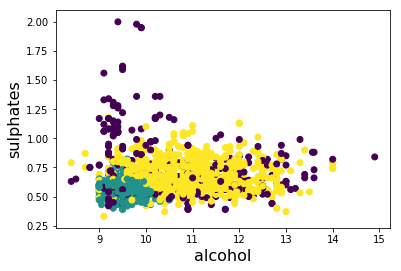

In [197]:
y_pred = gm.predict(wine_data_scaled)
plt.scatter(alcohol, sulphates, c=y_pred)
plt.xlabel("alcohol", fontsize = 16)
plt.ylabel("sulphates", fontsize = 16)
plt.show()

In [198]:
gm.n_iter_

24

###### Choosing number of clusters
<font color='blue'>We used Akaike information criterion (AIX) AND Bayesian information criterion (BIC) as criteria to select optimal number of clusters. The optimal number of clusters is the number that with minimum AIC/BIC.</font>

In [200]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(wine_data_scaled) for k in range(2, 11)]

bics = [model.bic(wine_data_scaled) for model in gms_per_k]
aics = [model.aic(wine_data_scaled) for model in gms_per_k]

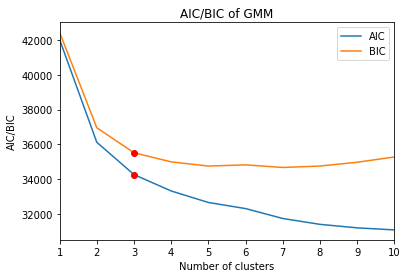

In [205]:
aic = dict()
bic = dict()
for k in range(1,11):
    estimator = GaussianMixture(n_components = k, random_state=42)
    res = estimator.fit(wine_data_scaled)
    ic1 = estimator.aic(wine_data_scaled)
    ic2 = estimator.bic(wine_data_scaled)
    aic[k] = ic1
    bic[k] = ic2
    
aic_df = pd.Series(aic)
bic_df = pd.Series(bic)

temp = {'AIC' : aic_df,
     'BIC' : bic_df}
ic_df = pd.DataFrame(temp)
ax = ic_df.plot(title='AIC/BIC of GMM')
ax.set_xlabel('k')
ax.set_ylabel('Information Criterion')
plt.plot(3,aic_df[3],'ro')
plt.plot(3,bic_df[3],'ro')

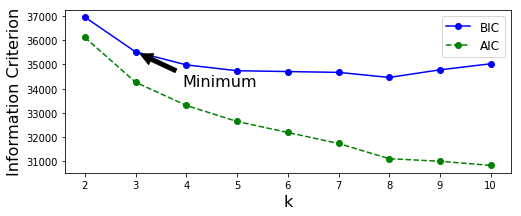

In [203]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), bics, "bo-", label="BIC")
plt.plot(range(2, 11), aics, "go--", label="AIC")
plt.xlabel("k", fontsize=16)
plt.ylabel("Information Criterion", fontsize=16)
plt.annotate('Minimum',
             xy=(3, bics[1]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend(fontsize=12)
plt.show()

<font color='blue'>From the figure above, we can see that considering both AIC and BIC, the number of clusters should be 3.</font>

<font color='blue'>We can search for best combination of values for both n_components and the covariance_type hyperparameter</font>

In [140]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(wine_data_scaled).bic(wine_data_scaled)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [141]:
print(best_k, best_covariance_type)

8 full


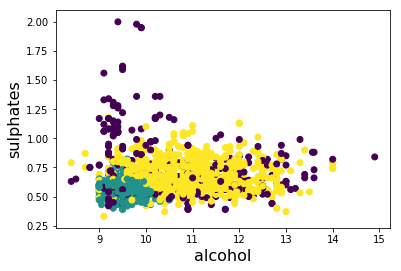

In [289]:
gm2 = GaussianMixture(n_components=8, n_init=11, random_state=42,covariance_type="full")
gm2.fit(wine_data_scaled)
y_pred2 = gm.predict(wine_data_scaled)
plt.scatter(alcohol, sulphates, c=y_pred2)
plt.xlabel("alcohol", fontsize = 16)
plt.ylabel("sulphates", fontsize = 16)
plt.show()

###### Bayesian Gaussian Mixtures
<font color='blue'>Bayesian GMM helps to eliminate the unnecessary clusters automatically instead of finding the optimal number of clusters manually. </font>

In [306]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(wine_data_scaled)

x, y = np.unique(np.round(bgm.weights_, 2), return_counts=True)
dict(zip(x, y))

{0.02: 1, 0.05: 3, 0.06: 1, 0.1: 1, 0.13: 1, 0.16: 1, 0.18: 1, 0.19: 1}

<font color='blue'>We can observe that algorithm automatically calculates the optimal clusters as 8.</font>

#### Quesetion 5:
Evaluate your results with the ground truth label: [Normalized Mutual Information score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html) and [Adjust Rand Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html ). Discuss how well did you do in Question 4.

#### Normalized Mutual Information (NMI)

<font color='blue'>Mutual Information of two random variables is a measure of the mutual dependence between the two variables. Normalized Mutual Information is a normalization of the Mutual Information (MI) score to scale the results between 0 indicates no mutual information and 1 indicates perfect correlation. To say simply, 0 means dissimilar and 1 means perfect match.</font>

#### Adjusted Rand Score (ARS)

<font color='blue'>Adjusted Rand Score on the other hand, computes a similarity measure between two clusters by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusters.Here ARS score 0 indicates lowest similarity and 1 indicates the highest similarity.</font>

##### Normalized mutual information score and adjusted_rand_score:

##### K-Means clustering

In [223]:
###We performed the scaling of data (0 to 5) in the pre-processing stage.
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
NMI_kmeans = normalized_mutual_info_score(k_means.labels_, quality)
print("NMI - kmeans: ",NMI_kmeans)
ARS_kmeans = adjusted_rand_score(k_means.labels_, quality)
print("ARS - Kmeans: ",ARS_kmeans)

NMI - kmeans:  0.058596241102602836
ARS - Kmeans:  0.033194362922283824


In [241]:
Avg_NMI_ARS_kmeans = (NMI_kmeans + ARS_kmeans) / 2
print("Average of NMI and ARS - Kmeans: ", Avg_NMI_ARS_kmeans)

Average of NMI and ARS - Kmeans:  0.04589530201244333


<font color='blue'>The normalized mutual information score and adjusted rand score for k means is 0.058 and 0.033. Average of both NMI and ARS also indicate the similarity. The higher the number, the better the result. For k-means the average score is 0.045. The scores are close to zero which is indicating the dissimilarity.</font>

##### DBSCAN

DBSCAN with eps=0.5, min_samples=5

In [312]:
db_labels=np.array(dbscan_2.labels_)
NMI_dbscan = normalized_mutual_info_score(db_labels, quality)
print("NMS - DBSCAN: ",NMI_dbscan)
ARS_dbscan = adjusted_rand_score(db_labels, quality)
print("ARS - DBSCAN: ",ARS_dbscan)

NMS - DBSCAN:  0.010806788758653763
ARS - DBSCAN:  -0.004378282038727896


In [313]:
Avg_NMI_ARS_dbscan = (NMI_dbscan + ARS_dbscan) / 2
print("Average of NMI and ARS - DBSCAN: ", Avg_NMI_ARS_dbscan)

Average of NMI and ARS - DBSCAN:  0.0032142533599629334


<font color='blue'>As we know that DBSCAN struggles with clusters of same density and with high dimensionality data and works best when the clusters are dense. In the same way above scores indicates high dissimilarity.</font>

##### Agglomerative

In [243]:
NMI_agg = normalized_mutual_info_score(agg.labels_, quality)
print("NMI - Agglomerative: ",NMI_agg)
ARS_agg = adjusted_rand_score(agg.labels_, quality)
print("ARS - Agglomerative: ",ARS_agg)

NMI - Agglomerative:  0.07177548923927715
ARS - Agglomerative:  0.04792750049153299


In [246]:
Avg_NMI_ARS_agg = (NMI_agg + ARS_agg) / 2
print("Average of NMI and ARS - Agglomerative: ", Avg_NMI_ARS_agg)

Average of NMI and ARS - Agglomerative:  0.05985149486540507


<font color='blue'>NMI and ARS scores of Agglomerative is much better than K-means and DBSCAN.While performing Agglomerative algorithm we choosen number of optimal clusters as 4 and number of truth labels are 6. </font>

##### Gaussian Mixtures

In [228]:
NMI_GM = normalized_mutual_info_score(y_pred2, quality)
print("NMI - Gaussian Mixtures: ",NMI_GM)
ARS_GM = adjusted_rand_score(y_pred2, quality)
print("ARS - Gaussian Mixtures: ",ARS_GM)

NMI - Gaussian Mixtures:  0.09445090642382249
ARS - Gaussian Mixtures:  0.07301055013316261


In [247]:
Avg_NMI_ARS_GM = (NMI_GM + ARS_GM) / 2
print("Average of NMI and ARS - Gaussian Mixtures: ", Avg_NMI_ARS_GM)

Average of NMI and ARS - Gaussian Mixtures:  0.08373072827849255


<font color='blue'>Gaussian mixtures have better scores than remaining algorithms. Gaussian Mixtures detected 8 clusters and we have 6 truth labels. </font>

<font color='blue'>Based on the scores above Gaussian Mixtures and Agglomerative clustering have better results than K-means and DBSCAN. But overall the results are not good. This does not mean that these algorithms are low-performing algorithms, just that they did not fit in our data. So we assume that the results are not satisfied to an expected extent in the previous question as it seems that data needs more preprocessing like removing the outliers, balancing the imbalanced data. </font>

#### Question 6:
Supervised learning: Utilize Voting classifier, bagging classifier (ensemble methods can include any supervised learning algorithms we introduced from before week 7) and Random Forest Classifier, compare the performance, interpret the results. 

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_data_scaled, quality, random_state=42)

#### Voting classifiers

<font color='blue'>The process of classifying instances based on multiple classifiers' decisions is called Ensemble learning classification. Voting rules say that the ensemble will predict the class based on the majority of votes. </font>

#### Hard Voting

<font color='blue'>If classifiers are only able to predict only one classifier class and do not provide any prediction probabilities, this is referred to Hard voting rule. </font>

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
model_acc = dict()
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [82]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [83]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    model_acc['Hard voting rule'] = accuracy_score(y_test, y_pred)

LogisticRegression 0.5875
RandomForestClassifier 0.6775
SVC 0.63
VotingClassifier 0.6225


#### Soft Voting

<font color='blue'>If all the classifiers in the ensemble have prediction probabilities then it's reffered as soft voting rule.</font>

In [84]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [85]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    model_acc['Soft voting rule'] = accuracy_score(y_test, y_pred)

LogisticRegression 0.5875
RandomForestClassifier 0.6775
SVC 0.63
VotingClassifier 0.6275


#### Bagging classifier

<font color='blue'>Bagging refers to the method of randomly sampling training instances with replacement. In statistics, sampling with replacement is also called bootstrapping. The term "with replacement" means that after one instance is taken randomly from the training set, a replacement of this instance is put into the training set. When the next instance is selected, there is a chance that this next instance selected is the same as the previous instance selected.</font>

In [86]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
model_acc['Bagging'] = accuracy_score(y_test, y_pred)

0.5925


In [88]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))
model_acc['Decision tree'] = accuracy_score(y_test, y_pred_tree)

0.5875


#### out of bag evaluation

<font color='blue'>During bagging, each subsample is used to train one classifier. For each classifier, the samples that are not seen during training is called out-of-bag instances. </font>

In [89]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.6939115929941618

In [90]:
bag_clf.oob_decision_function_

array([[0.0106383 , 0.05319149, 0.81914894, 0.11702128, 0.        ,
        0.        ],
       [0.00555556, 0.08888889, 0.84444444, 0.06111111, 0.        ,
        0.        ],
       [0.01666667, 0.12777778, 0.17777778, 0.61111111, 0.06111111,
        0.00555556],
       ...,
       [0.        , 0.        , 0.96891192, 0.03108808, 0.        ,
        0.        ],
       [0.        , 0.        , 0.07344633, 0.23728814, 0.63276836,
        0.05649718],
       [0.        , 0.02659574, 0.15957447, 0.41489362, 0.39361702,
        0.00531915]])

In [91]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
model_acc['oob'] = accuracy_score(y_test, y_pred)

0.65


## Random Forest

<font color='blue'>Random forest algorithm introduces extra randomness that is, search for best feature among a random subset of features. Usually, a random forest algorithm is more convenient and optimized for the decision tree than bagging. In the case of classifications, the class with the highest mean probability across all trees is selected.</font>

In [92]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [93]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))
model_acc['Random forest'] = accuracy_score(y_test, y_pred_rf)

0.655


#### Comparing Models

In [94]:
acc_df = pd.DataFrame(index=list(model_acc.keys()), data=list(model_acc.values()), columns=['score'])
acc_df.shape

(6, 1)

In [95]:
acc_df['score']

Hard voting rule    0.6225
Soft voting rule    0.6275
Bagging             0.5925
Decision tree       0.5875
oob                 0.6500
Random forest       0.6550
Name: score, dtype: float64

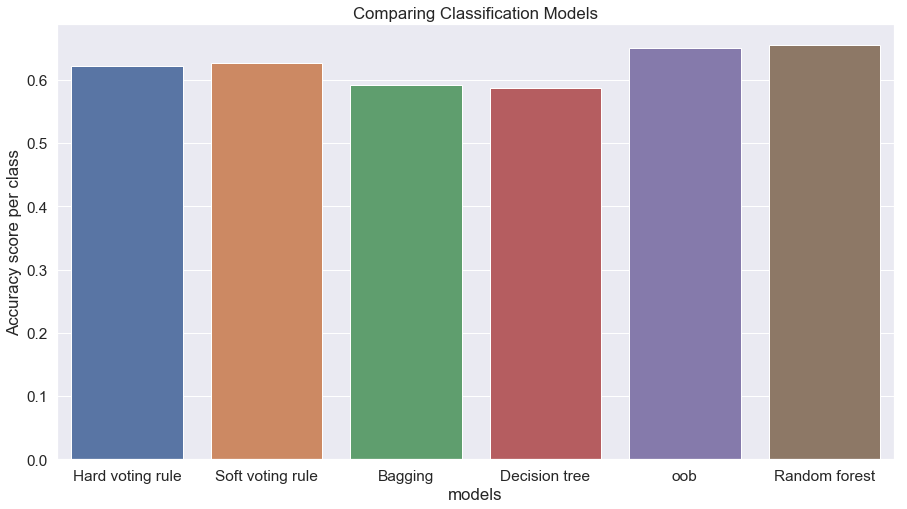

In [97]:
sns.set(font_scale=1.4)
plt.figure(figsize=(15,8))
sns.barplot(x=acc_df.index, y=acc_df['score'])
plt.ylabel('Accuracy score per class')
plt.xlabel('models')
plt.title('Comparing Classification Models')
plt.show()

<font color='blue'>We performed modeling using different algorithms and observed that Random forest has fairly better performance when compared with other models. Random forest and out of bag evaluation got almost similar accuracy value. Both hard and soft voting rules showed similar performance. It is interesting that the accuracy of all the algorithms is in the interval of 58 to 70 varying different parameters of each algorithm. We believe that the performance of the model will increase if we apply some sampling techniques to correct the unbalanced data and also by checking and removing the outliers.</font>

#### Feature Importance

In [98]:
from collections import OrderedDict 
feats_imps = OrderedDict(zip(wine_data.columns, rnd_clf.feature_importances_))
feats_imps = pd.DataFrame(index=feats_imps.keys(), data=feats_imps.values(),
                          columns=['feature_importance']).sort_values(by='feature_importance', ascending=False)
feats_imps

,feature_importance
alcohol,0.147419
sulphates,0.112078
total_sulfur_dioxide,0.106343
volatile_acidity,0.100745
density,0.095370
chlorides,0.079232
citric_acid,0.074532
fixed_acidity,0.074281
pH,0.072476
residual_sugar,0.071065


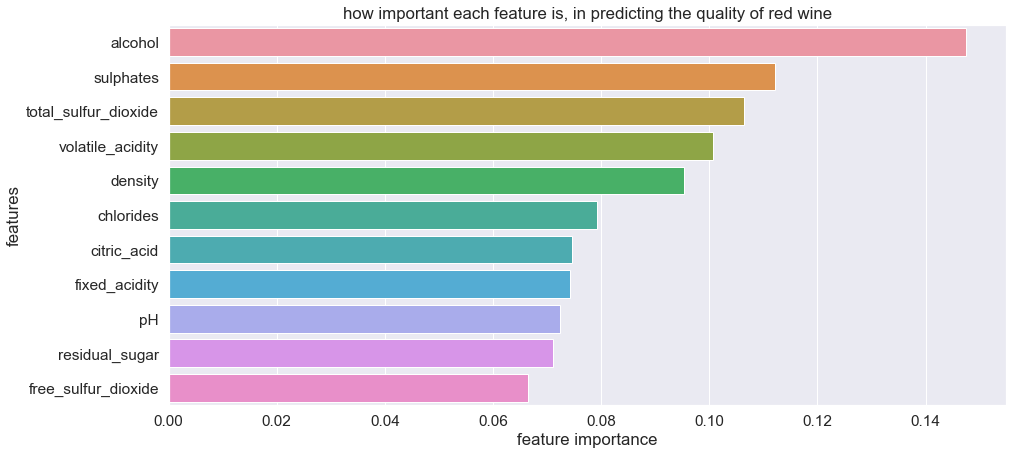

In [99]:
plt.figure(figsize=(15,7))
sns.barplot(y=feats_imps.index, x=feats_imps['feature_importance'])
plt.xlabel('feature importance')
plt.ylabel('features')
plt.title('how important each feature is, in predicting the quality of red wine')
plt.show()

#### Question 7:
Tune the parameters for Random Forest Classifier, does changing the `class-weight` help? Discuss your results and findings.

<font color='blue'>For class-weight, the “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.</font>

In [100]:
from sklearn.model_selection import GridSearchCV
bal_dict = [{0:1,1:60},{0:1,1:12},{0:1,1:1},{0:1,1:1},{0:1,1:3},{0:1,1:33}]
params = {"n_estimators":[100,200,300,400,500],"criterion":["gini","entropy"],
                   "class_weight" :["balanced", "balanced_subsample",bal_dict, None],  "max_samples":[100,200,300,400,500]}
grid = GridSearchCV(RandomForestClassifier(random_state=42),param_grid=params, cv = 5)
grid.fit(X_train, y_train)
grid.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_samples': 500,
 'n_estimators': 500}

In [103]:
y_pred_grid = grid.predict(X_test)
print("Accuracy of Random Forest :",accuracy_score(y_test, y_pred_grid))

Accuracy of Random Forest : 0.675


<font color='blue'>We performed grid-search with different tuning parameters and there is a slight improvement in the classification task by using the class-weight parameter. While class weight parameter value is 'none', we observed that performance decreased in a few instances while performance is better with default values. We got an accuracy of 65.5 with default parameters. We also observed that change in the impacts of the n_estimator value in the performance of classification, accuracy score varied for the increase and decrease on the parameter. we got the best accuracy when n_estimators value is 500. random_state also effects the performance of the classifier. By tuning with different parameters and using the class_weight parameter we got the accuracy of 67.5.</font>